<a href="https://colab.research.google.com/github/abhilash2272/RandomForestClassifier/blob/main/RandomForest_Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df=pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [83]:
x=df.iloc[: ,2:4].values
y=df.iloc[: ,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [84]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [85]:
y_pred=classifier.predict(x_test)
print(y_pred)

[1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 1 0 0]


In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[47  5]
 [ 6 22]]
0.8625


<Axes: >

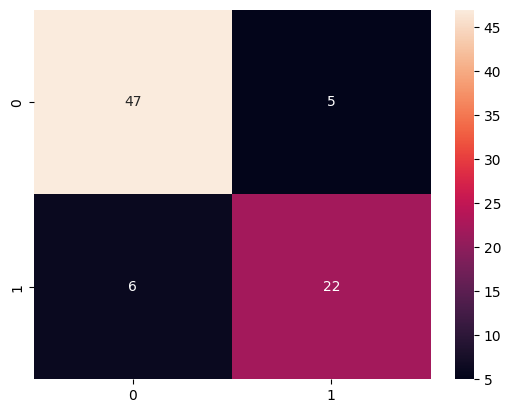

In [87]:
sns.heatmap(cm,annot=True)

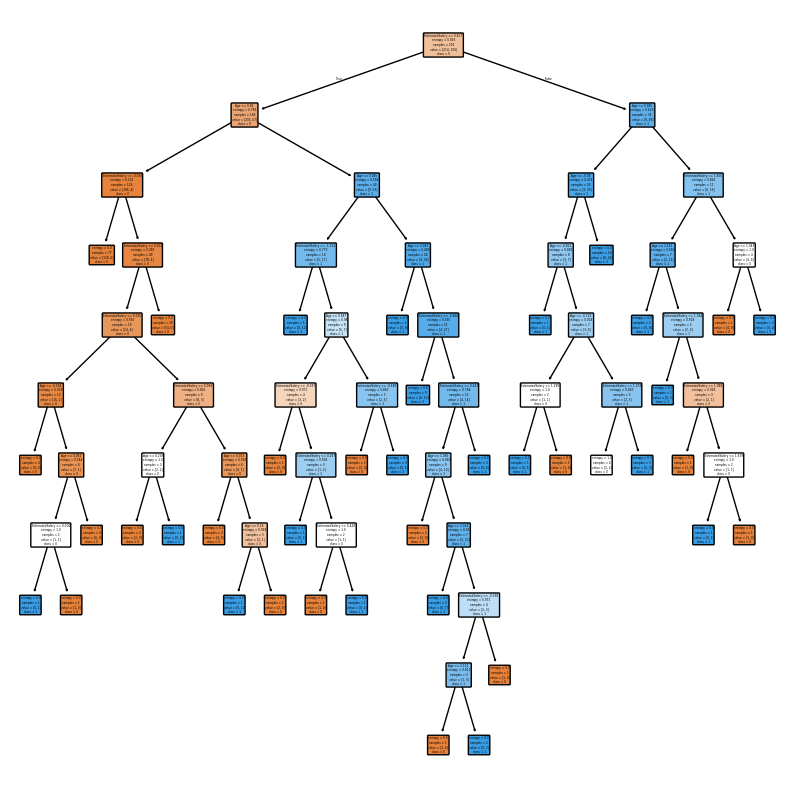

In [88]:
from sklearn.tree import plot_tree
single_tree=classifier.estimators_[0]
plt.figure(figsize=(10,10))
plot_tree(single_tree,
          feature_names=['Age','EstimatedSalary'],
          class_names=['0','1'],
          filled=True,
          rounded=True
          )
plt.show()